### Load SNOTEL Data from the sites around Juneau

Notebook contents 
* Heen Latinee, AK (#1270): https://wcc.sc.egov.usda.gov/nwcc/site?sitenum=1270
* Long Lake, AK (#1001): https://wcc.sc.egov.usda.gov/nwcc/site?sitenum=1001
* Honah, AK (#1318): https://wcc.sc.egov.usda.gov/nwcc/site?sitenum=1318

created by Cassie Lumbrazo\
last updated: Oct 2025\
run location: UAS linux\
python environment: **snotel** which includes the *climata* snotel data downloader python package and *ulmo* 

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns 

# sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

In [2]:
pwd

'/home/cassie/python/repos/snowdepth_teleconnections'

### climata or ulmo
is a python interface for climate/time series data download, inlcuding climata.snotel module for AWDB / NRCS SNOTEL stations

In [5]:
import climata
# from climata import SnotelDaily

In [4]:
import ulmo

### or, using **requests**

In [3]:
import requests

In [4]:
from io import StringIO

In [12]:
def download_hourly(site_num, start_date, end_date, vars_list):
    """
    Download hourly data for a SNOTEL site via NWCC reportGenerator endpoint.
    """
    station_triple = f"{site_num}:AK:SNTL"
    var_param = ",".join(f"{v}::value" for v in vars_list)
    
    url = (
        "https://wcc.sc.egov.usda.gov/reportGenerator/view_csv/"
        f"customSingleStationReport/hourly/{station_triple}/"
        f"{start_date},{end_date}/{var_param}"
    )

    print("Requesting:", url)
    resp = requests.get(url)
    resp.raise_for_status()

    # Read CSV while skipping metadata rows (usually first 6–7 lines)
    df = pd.read_csv(StringIO(resp.text), skiprows=8)

    # Rename first column to "datetime"
    df.rename(columns={df.columns[0]: "datetime"}, inplace=True)

    # Parse datetime column
    df["datetime"] = pd.to_datetime(df["datetime"])
    
    return df

In [13]:
# Example usage:
site = 1270
start = "2020-10-01"
end = "2021-09-30"
vars_wanted = ["SNWD", "WTEQ", "PREC", "TOBS"]

df = download_hourly(site, start, end, vars_wanted)
print(df.head())

Requesting: https://wcc.sc.egov.usda.gov/reportGenerator/view_csv/customSingleStationReport/hourly/1270:AK:SNTL/2020-10-01,2021-09-30/SNWD::value,WTEQ::value,PREC::value,TOBS::value


ParserError: Error tokenizing data. C error: Expected 1 fields in line 24, saw 2


## Website Download

Or, just download the csv by wateryear from here\
https://wcc.sc.egov.usda.gov/nwcc/site?sitenum=1270

by selecting 
All Sensors, Hourly, CSV, Water Year, Select the Year, Water Year, All Days

In [14]:
# csv by wateryear are in the following locations, 
site1270_folder = '/hdd/snow_hydrology/met_station/snotel/heenlatinee/'
site1001_folder = '/hdd/snow_hydrology/met_station/snotel/longlake/'
site1318_folder = '/hdd/snow_hydrology/met_station/snotel/honah/'

In [18]:
# Open an example csv 
df1270 = pd.read_csv(site1270_folder + '1270_ALL_WATERYEAR=2025.csv', skiprows=6)
df1270

,Site Id,Date,Time,WTEQ.I-1 (in),PREC.I-1 (in),PREC.I-2 (in),TOBS.I-1 (degC),SNWD.I-1 (in),BATT.I-1 (volt),WDIRV.H-1 (degr),...,DIAG.I-2 (unkn),DIAG.I-3 (unkn),DIAG.I-4 (unkn),DIAG.I-5 (unkn),DIAG.I-6 (unkn),DIAG.I-7 (unkn),DIAG.I-8 (unkn),DIAG.I-9 (unkn),DIAG.I-10 (unkn),Unnamed: 24
0,1270,2024-10-01,00:00,-99.9,-99.9,-99.9,-99.9,0.0,13.19,-99.9,...,222.0,0.0,3144.0,12.0,0.0,-52.0,0.0,-52.0,175.0,NaN
1,1270,2024-10-01,01:00,-99.9,-99.9,-99.9,-99.9,0.0,13.17,-99.9,...,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,NaN
2,1270,2024-10-01,02:00,-99.9,-99.9,-99.9,-99.9,0.0,13.15,-99.9,...,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,NaN
3,1270,2024-10-01,03:00,-99.9,-99.9,-99.9,-99.9,0.0,13.13,-99.9,...,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,NaN
4,1270,2024-10-01,04:00,-99.9,-99.9,-99.9,-99.9,0.0,13.12,-99.9,...,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1270,2025-09-30,20:00,-99.9,-99.9,-99.9,-99.9,0.0,13.26,-99.9,...,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,NaN
8689,1270,2025-09-30,21:00,-99.9,-99.9,-99.9,-99.9,0.0,13.24,-99.9,...,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,NaN
8690,1270,2025-09-30,22:00,-99.9,-99.9,-99.9,-99.9,0.0,13.22,-99.9,...,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,NaN
8691,1270,2025-09-30,23:00,-99.9,-99.9,-99.9,-99.9,0.0,13.19,-99.9,...,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,NaN


In [19]:
# make datetime from the "Date" and "Time" columns
df1270['datetime'] = pd.to_datetime(df1270['Date'] + ' '+ df1270['Time'])
df1270 = df1270.set_index('datetime')
df1270.head()

,Site Id,Date,Time,WTEQ.I-1 (in),PREC.I-1 (in),PREC.I-2 (in),TOBS.I-1 (degC),SNWD.I-1 (in),BATT.I-1 (volt),WDIRV.H-1 (degr),...,DIAG.I-2 (unkn),DIAG.I-3 (unkn),DIAG.I-4 (unkn),DIAG.I-5 (unkn),DIAG.I-6 (unkn),DIAG.I-7 (unkn),DIAG.I-8 (unkn),DIAG.I-9 (unkn),DIAG.I-10 (unkn),Unnamed: 24
datetime,,,,,,,,,,,,,,,,,,,,,
2024-10-01 00:00:00,1270,2024-10-01,00:00,-99.9,-99.9,-99.9,-99.9,0.0,13.19,-99.9,...,222.0,0.0,3144.0,12.0,0.0,-52.0,0.0,-52.0,175.0,NaN
2024-10-01 01:00:00,1270,2024-10-01,01:00,-99.9,-99.9,-99.9,-99.9,0.0,13.17,-99.9,...,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,NaN
2024-10-01 02:00:00,1270,2024-10-01,02:00,-99.9,-99.9,-99.9,-99.9,0.0,13.15,-99.9,...,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,NaN
2024-10-01 03:00:00,1270,2024-10-01,03:00,-99.9,-99.9,-99.9,-99.9,0.0,13.13,-99.9,...,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,NaN
2024-10-01 04:00:00,1270,2024-10-01,04:00,-99.9,-99.9,-99.9,-99.9,0.0,13.12,-99.9,...,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,-99.9,NaN


In [22]:
df1270.columns

Index(['Site Id', 'Date', 'Time', 'WTEQ.I-1 (in) ', 'PREC.I-1 (in) ',
       'PREC.I-2 (in) ', 'TOBS.I-1 (degC) ', 'SNWD.I-1 (in) ',
       'BATT.I-1 (volt) ', 'WDIRV.H-1 (degr) ', 'WSPDX.H-1 (mph) ',
       'WSPDV.H-1 (mph) ', 'RHUM.I-1 (pct) ', 'PRES.I-1 (mbar) ',
       'DIAG.I-1 (unkn) ', 'DIAG.I-2 (unkn) ', 'DIAG.I-3 (unkn) ',
       'DIAG.I-4 (unkn) ', 'DIAG.I-5 (unkn) ', 'DIAG.I-6 (unkn) ',
       'DIAG.I-7 (unkn) ', 'DIAG.I-8 (unkn) ', 'DIAG.I-9 (unkn) ',
       'DIAG.I-10 (unkn) ', 'Unnamed: 24'],
      dtype='object')

In [26]:
# make all -99.9 or 99.9 nan 
df1270.replace(-99.9, np.nan, inplace=True)
# df1270.replace(99.9, np.nan, inplace=True)

<Axes: xlabel='datetime'>

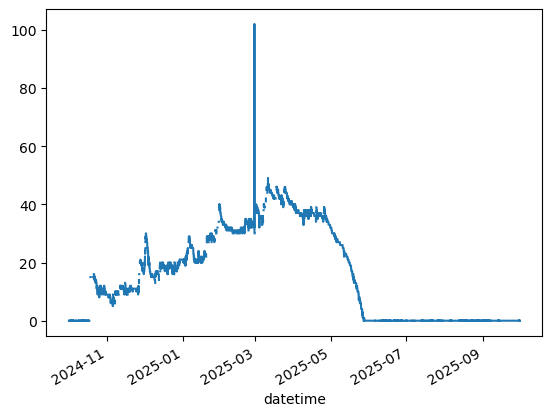

In [25]:
df1270['SNWD.I-1 (in) '].plot()